# Criando e executando o modelo de Regressão Linear usando tensorflow 2. com dados fictícios.

In [2]:
#Importação de bibliotecas
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Hyperparâmetros do modelo

learning_rate = 0.01
training_epochs = 2000
display_step = 200

In [9]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_Y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

In [10]:
#Placeholders para as variáveis preditoras(x) e para variável target(y)

x = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)

#Pesos e bias do modelo

w = tf.Variable(np.random.randn(), name="weigth")
b = tf.Variable(np.random.randn(), name="bias")

In [11]:
#Construindo o modelo : y = w*X + b

linear_model = w*x + b

# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Epoch:   200 	 Custo (Erro):     0.101 	 W:0.1638 	 b: 1.422
Epoch:   400 	 Custo (Erro):   0.09171 	 W:0.1827 	 b: 1.287
Epoch:   600 	 Custo (Erro):   0.08602 	 W:0.1976 	 b: 1.182
Epoch:   800 	 Custo (Erro):   0.08252 	 W:0.2092 	 b: 1.099
Epoch:  1000 	 Custo (Erro):   0.08037 	 W:0.2184 	 b: 1.035
Epoch:  1200 	 Custo (Erro):   0.07905 	 W:0.2255 	 b:0.9837
Epoch:  1400 	 Custo (Erro):   0.07823 	 W:0.2312 	 b:0.9439
Epoch:  1600 	 Custo (Erro):   0.07773 	 W:0.2356 	 b:0.9126
Epoch:  1800 	 Custo (Erro):   0.07742 	 W: 0.239 	 b: 0.888
Epoch:  2000 	 Custo (Erro):   0.07723 	 W:0.2418 	 b:0.8688

Otimização Concluída!
Custo Final de Treinamento: 0.077232085  - W Final: 0.2417621  - b Final: 0.8687951 



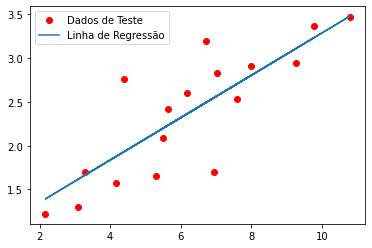

Custo Final em Teste: 0.080629244
Diferença Média Quadrada Absoluta: 0.0033971593


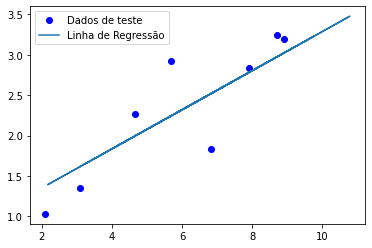

In [16]:
#Definindo a inicialização das variáveis

init = tf.global_variables_initializer()

#Iniciando a sessão
with tf.Session() as sess:
    #Inicializando as variáveis
    sess.run(init)
    
    #Treinando o modelo
    for epoch in range(training_epochs):
        
        #Otimizando
        sess.run(optimizer, feed_dict={x: train_X, y: train_Y})
        
        #Exibindo épocas
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={x: train_X, y: train_Y})
            print("Epoch:{0:6} \t Custo (Erro):{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(w), sess.run(b)))
        
    # Imprimindo os parâmetros finais do modelo
    print("\nOtimização Concluída!")
    training_cost = sess.run(cost, feed_dict={x: train_X, y: train_Y})
    print("Custo Final de Treinamento:", training_cost, " - W Final:", sess.run(w), " - b Final:", sess.run(b), '\n')
    
    #Vizualização do resultado
    plt.plot(train_X, train_Y, 'ro', label="Dados de Teste")
    plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label="Linha de Regressão")
    plt.legend()
    plt.show()
    
    #Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), feed_dict={x:test_X, y:test_y} )
    
    print("Custo Final em Teste:", testing_cost)
    print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
    
    #Visualização dos testes
    plt.plot(test_X, test_Y, 'bo', label="Dados de teste")
    plt.plot(train_X, sess.run(w) * train_X + sess.run(b), label="Linha de Regressão")
    plt.legend()
    plt.show()

sess.close()